# Mid-Project

## Execise 1: Market-Based Valuation

- An at a prespecified price (strike) at a predetermined date (European option) or over a determined
    period of time (American option). Some options are settled in actual stocks; most options, like
    those on an index, are settled in cash. People or institutions selling options are called option
    writers. Those buying options are called option holders.

- For a European call option on an index with strike 8,000 and index level of 8,200
    at maturity, the option holder receives the difference 8,200 − 8,000 = 200 (e.g. in EUR or
    USD) from the option writer. If the index level is below the strike, say at 7,800, the option
    expires worthless and the writer does not have to pay anything. We can formalize this via
    the so-called inner value (or intrinsic value or payoff)—from the holder's viewpoint—of
    the option:
    
    $ h_T(S, K) = max[S_T − K, 0]$ 
    
    - where T is the maturity date of the option, $S_T$ the index level at this date and $K$ represents the
        strike price.
       
1. Compute the Inner value of a European call option on a stock index with strike of 8,000 dependent on the index level at maturity and plot this inner value function.

- Desired output:   
![call_inner_values](../data/02_mbv/call_inner_values.png)

2. What are the three scenarios that have to be distinguished with regard to the so-called moneyness of an option ? 
>    - in-the-money (ITM): ...
>    - at-the-money (ATM): ...
>    - out-of-the-money (OTM): ...

3. What influences the present value of such a call option today? ([factors](https://www.investopedia.com/trading/factors-determine-option-pricing/))

4. Compute and plot the Black-Scholes-Merton formula.

- Input:

These heuristic insights are formalized in the seminal work of Black-Scholes-Merton (cf. Black and Scholes (1973) and Merton (1973)) who for the first time derived a closed option pricing formula for a parsimonious set of input parameters. Their formula says mainly the following:

$C_0^∗ = C^{BSM}(S_0 , K, T, r, \sigma)$ ([BSM_option_valuation](https://www.investopedia.com/terms/b/blackscholes.asp))

In words, the fair present value of a European call option $C_0^∗$ is given by their formula $C^{BSM}(\cdot)$ which takes as input parameters:
    
- $S_0$ the current index level
- $K$ the strike price of the option
- $T$ the maturity date (equals time-to-maturity viewed from the present date)
- $r$ the constant risk-less short rate
- $\sigma$ the volatility of the index, i.e. the standard deviation of the index level returns


- Desired output:   
 ![BSM_call_value](../data/02_mbv/call_values.png)


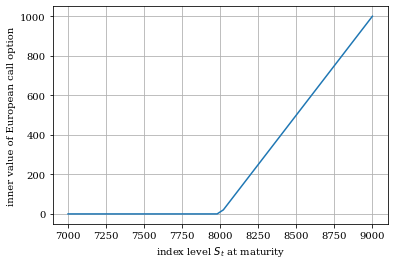

In [9]:
#1ere question:Compute the Inner value of a European call option on a stock index with strike of 8,000 dependent on the index level at maturity and plot this inner value function.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
K = 8000 #strike
S = np.linspace(7000, 9000) # the index level S 
h = np.maximum(S-K,0) # values of call option
plt.plot(S, h) # plot inner values at maturity
plt.xlabel('index level $S_t$ at maturity')
plt.ylabel('inner value of European call option')
plt.grid(True)
plt.show()

In [69]:
import math
from scipy.integrate import quad

In [70]:
def dN(x):
#Probability density function of standard normal random variable x
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

In [71]:
def N(d):
    return quad(lambda x: dN(x), -20, d, limit=50)[0]


In [72]:
def d1f(St, K, T, r, sigma):
    #Black-Scholes-Merton d1 function.
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)* (T)) / (sigma * math.sqrt(T))
    return d1

In [73]:
def BSM_call_value(St, K, T, r, sigma):
    d1 = d1f(St, K, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T)
    call_value = St * N(d1) - math.exp(-r * (T)) * K * N(d2)
    return call_value

In [74]:
K = 8000 # strike price
T = 1.0 # time-to-maturity
r = 0.025 # constant, risk-less short rate
vol = 0.2 # constant volatility
S = np.linspace(4000, 12000, 150)
h = np.maximum(S - K, 0) # inner value of option
C = [BSM_call_value(S0, K, T, r, vol) for S0 in S]

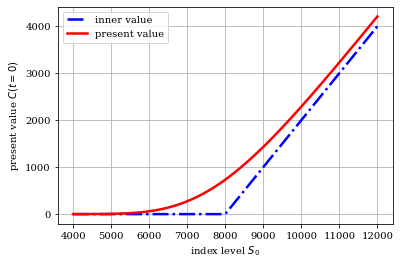

In [76]:
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')
# plot inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')
# plot option present value
plt.grid(True)
plt.legend()
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')
plt.show()

## Exercise 2: MonteCarlo Simulation

- Implement all models included on the pdf file [MonteCarlo](../data/MonteCarlo.pdf)